# Alzherimer's Detection using MRI Scans

In [0]:
!tar -xf dataset.tar.xz

In [0]:
PATH = 'dataset/'

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(PATH, valid='validation', ds_tfms=tfms, bs=64, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes

['alzheimers', 'non_alzheimers']

In [14]:
model = cnn_learner(data, models.resnet152, metrics=accuracy, pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 230M/230M [00:11<00:00, 20.7MB/s]


In [15]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.002318,0.884083,0.671875,02:51
1,0.713629,0.581685,0.707031,02:44
2,0.590043,0.519000,0.744531,02:47
3,0.524860,0.476669,0.771875,02:43
4,0.486324,0.476996,0.768750,02:46


In [0]:
model.save('alzheimersv1-initial')
model.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.32E-05


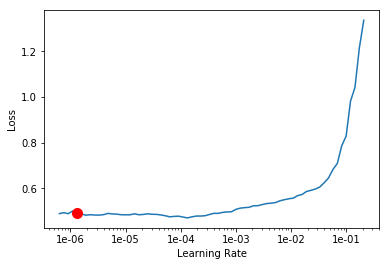

In [17]:
model.lr_find()
model.recorder.plot(suggestion=True)

In [18]:
model.fit_one_cycle(10, max_lr=1.32e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.484814,0.475016,0.766406,03:41
1,0.474025,0.468048,0.778125,03:38
2,0.472599,0.461479,0.775781,03:41
3,0.462710,0.450176,0.793750,03:39
4,0.456132,0.447545,0.791406,03:41
5,0.447577,0.440717,0.795313,03:40
6,0.450217,0.435593,0.800000,03:39
7,0.436640,0.432902,0.804688,03:42
8,0.443987,0.434114,0.800000,03:37
9,0.438439,0.437331,0.798437,03:42


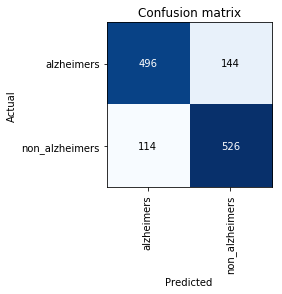

In [19]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

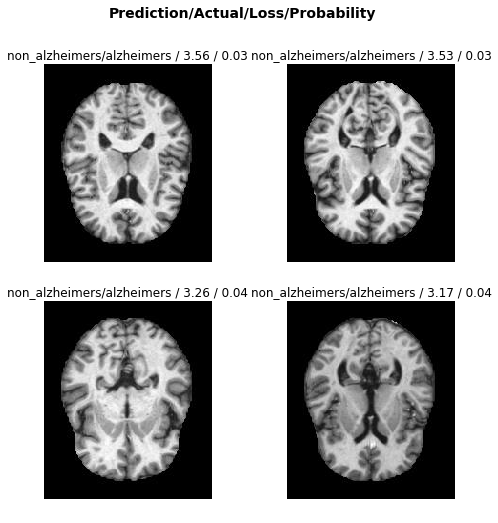

In [23]:
interp.plot_top_losses(4, figsize=(8,8))

In [0]:
model.save('alzheimers')
model.export()